In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from ast import literal_eval

df = pd.read_csv(r"C:\\Users\\JellevanAs\\Documents\\Studie\\Thesis\\df-englisch_cat.csv")


df = df.drop(df.columns[0], axis=1)
df.columns.tolist()

y = df['numerical_price']

# Dropping the 'ada_embedding_eng' column from df
z = df.drop(["ada_embedding_eng", "numerical_price"], axis=1)


x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42)


In [2]:
# Function to compare proportions
def compare_categorical_proportions(full_data, test_data, column):
    prop_full = full_data[column].value_counts(normalize=True)
    prop_test = test_data[column].value_counts(normalize=True)
    comparison = pd.DataFrame({'Full Data': prop_full, 'Test Data': prop_test})
    return comparison

# List of categorical columns (replace with your actual categorical columns)
categorical_columns = [
 'num_bedrooms',
 'num_rooms',
 'building_type_Bestaande bouw',
 'building_type_Nieuwbouw',
 'building_type_na',
 'tag_k.k.',
 'tag_v.o.n.',
 'house_category_Appartement',
 'house_category_Bungalow',
 'house_category_Eengezinswoning',
 'house_category_Grachtenpand',
 'house_category_Herenhuis',
 'house_category_Landhuis',
 'house_category_Other',
 'house_category_Unknown',
 'house_category_Villa',
 'house_category_Woonboerderij',
 'house_category_Woonboot',
 'energy_label_encoded',
]


# Comparing proportions for each categorical column
for column in categorical_columns:
    comparison_props = compare_categorical_proportions(x_train, x_test, column)
    print(f"Proportions for {column}:\n{comparison_props}\n")

Proportions for num_bedrooms:
              Full Data  Test Data
num_bedrooms                      
2              0.225516   0.224814
3              0.407655   0.409429
4              0.233102   0.233771
5              0.092224   0.089981
6              0.027113   0.028327
7              0.008106   0.007637
8              0.003437   0.003541
9              0.001337   0.000903
10             0.000625   0.000625
11             0.000330   0.000208
12             0.000278   0.000278
13             0.000104   0.000069
14             0.000087        NaN
15             0.000017   0.000139
16             0.000035   0.000139
18                  NaN   0.000139
20             0.000017        NaN
49             0.000017        NaN

Proportions for num_rooms:
           Full Data  Test Data
num_rooms                      
1           0.015640   0.014858
2           0.066464   0.065195
3           0.203402   0.206276
4           0.207638   0.206068
5           0.258532   0.258557
6           0.1265

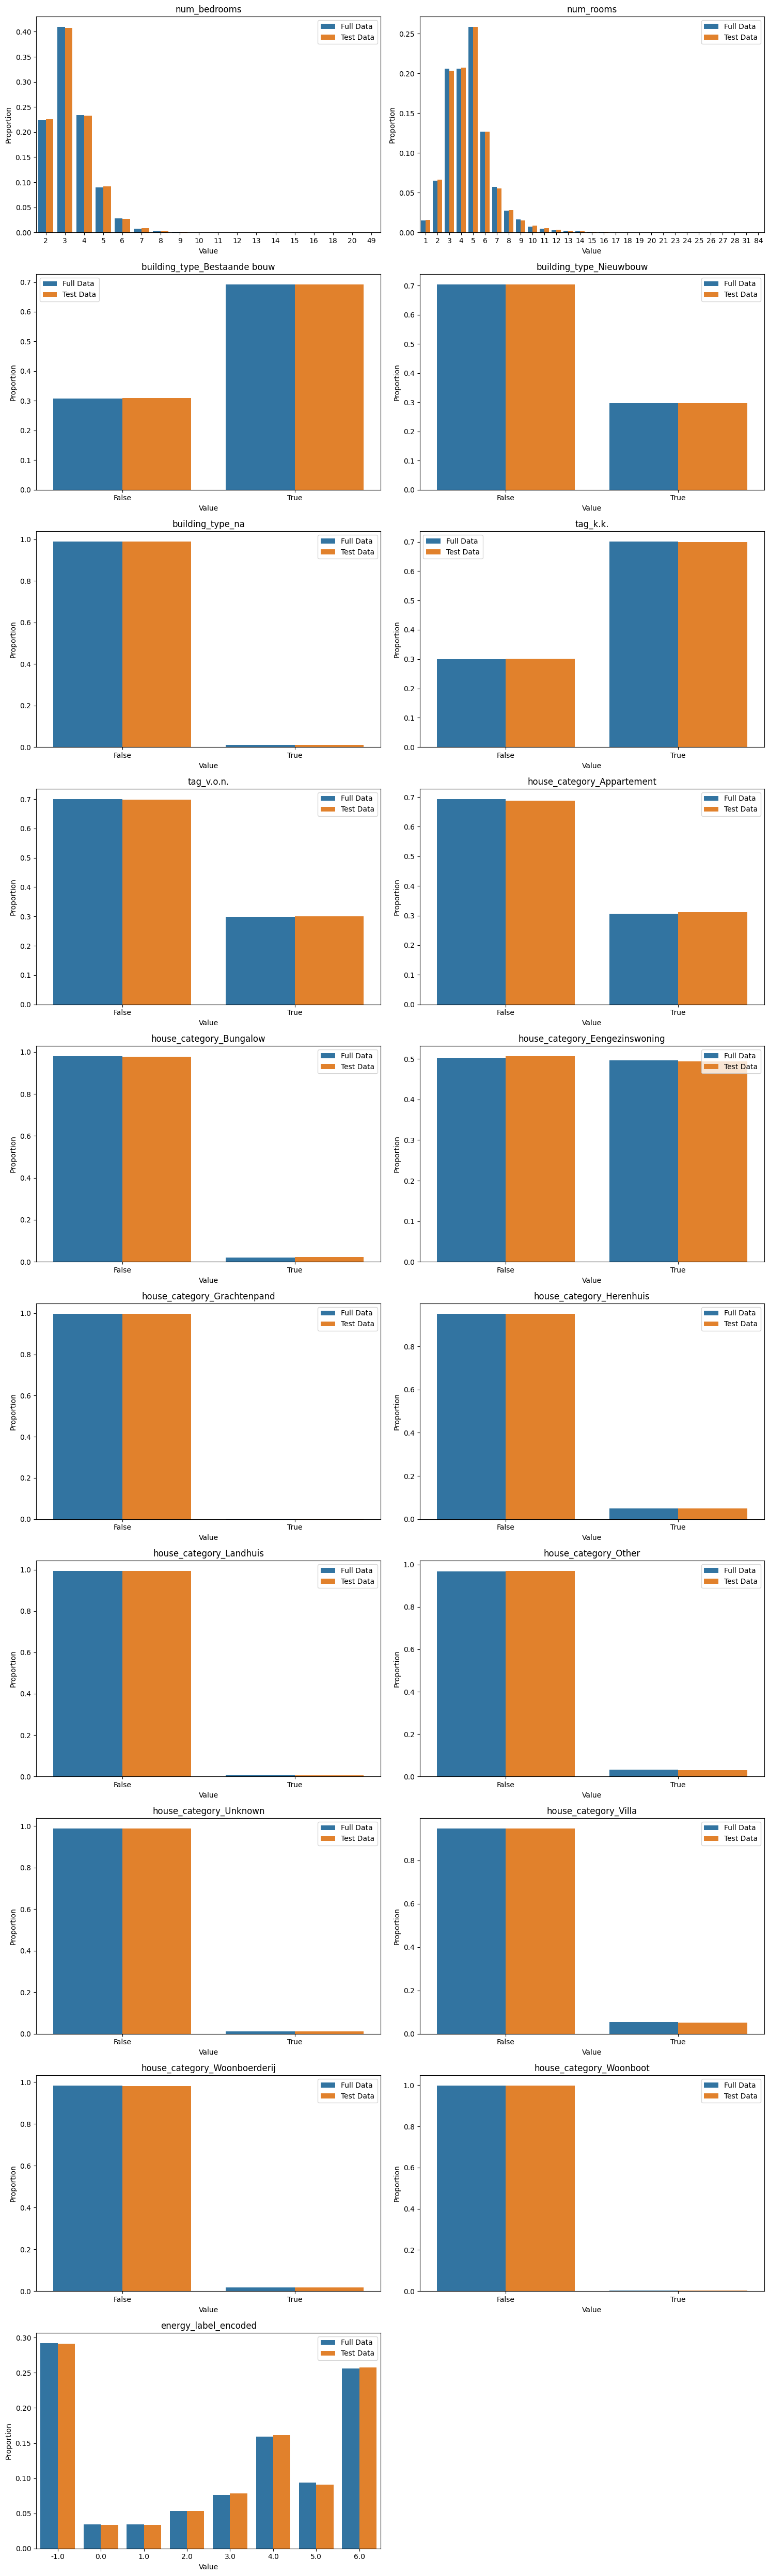

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparing proportions for each categorical column and storing results
comparison_results = {}
for column in categorical_columns:
    comparison_results[column] = compare_categorical_proportions(x_test, x_train, column)

# Set up the matplotlib figure
rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot each category
for i, category in enumerate(categorical_columns):
    if category in comparison_results:
        subset = comparison_results[category].reset_index()
        subset_melted = subset.melt(id_vars=subset.columns[0], var_name='Dataset', value_name='Proportion')
        sns.barplot(x=subset.columns[0], y='Proportion', hue='Dataset', data=subset_melted, ax=axes[i])
        axes[i].set_title(category)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Proportion')
        axes[i].legend()

# Adjust layout for any uneven number of plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [3]:
def compare_numerical_statistics_series(train_series, test_series):
    # Ensure the inputs are indeed pandas Series
    if not isinstance(train_series, pd.Series) or not isinstance(test_series, pd.Series):
        raise ValueError("Both train_series and test_series must be pandas Series")

    # Generating descriptive statistics
    stats_train = train_series.describe()
    stats_test = test_series.describe()

    # Concatenating the results for comparison
    comparison = pd.concat([stats_train, stats_test], axis=1, keys=['Train Data', 'Test Data'])
    return comparison

# Example usage (replace y_train and y_test with your actual Series)
comparison_stats = compare_numerical_statistics_series(y_train, y_test)
print(comparison_stats)


         Train Data     Test Data
count  5.761000e+04  1.440300e+04
mean   5.550987e+05  5.536668e+05
std    4.158601e+05  4.011501e+05
min    1.000000e+05  1.000000e+05
25%    3.490000e+05  3.490000e+05
50%    4.600000e+05  4.595000e+05
75%    6.450000e+05  6.450000e+05
max    1.800000e+07  9.900000e+06


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_series_distributions(train_series, test_series, title=""):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(train_series, label='Train Data', shade=True)
    sns.kdeplot(test_series, label='Test Data', shade=True)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\3027608108.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_series, label='Train Data', shade=True)
C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\3027608108.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_series, label='Test Data', shade=True)


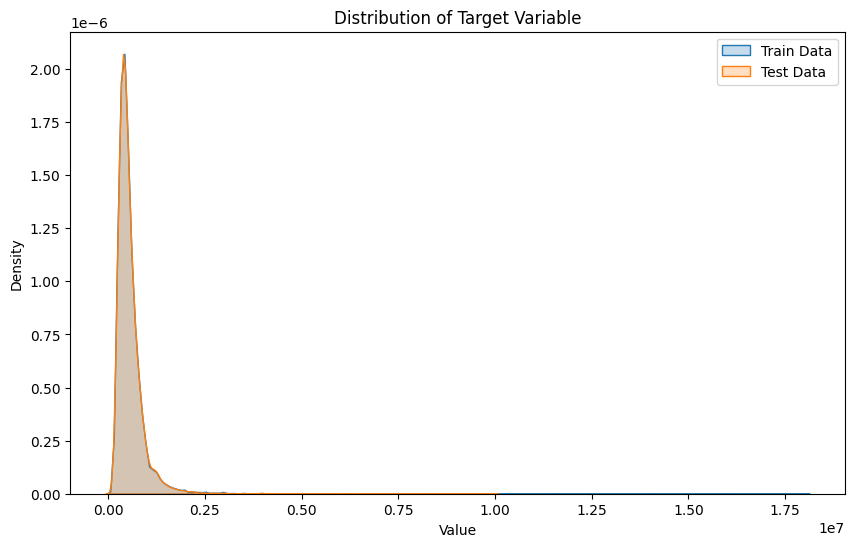

In [5]:


plot_series_distributions(y_train, y_test, title="Distribution of Target Variable")


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_series_distributions(train_series, test_series, title=""):
    plt.figure(figsize=(10, 6))
    # Applying a logarithmic transformation to reduce right skewness
    sns.kdeplot(np.log(train_series + 1), label='Train Data', shade=True)  # Adding 1 to avoid log(0)
    sns.kdeplot(np.log(test_series + 1), label='Test Data', shade=True)    # Adding 1 to avoid log(0)
    plt.title(title)
    plt.xlabel('Log Transformed Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\4048939002.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log(train_series + 1), label='Train Data', shade=True)  # Adding 1 to avoid log(0)
C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\4048939002.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log(test_series + 1), label='Test Data', shade=True)    # Adding 1 to avoid log(0)


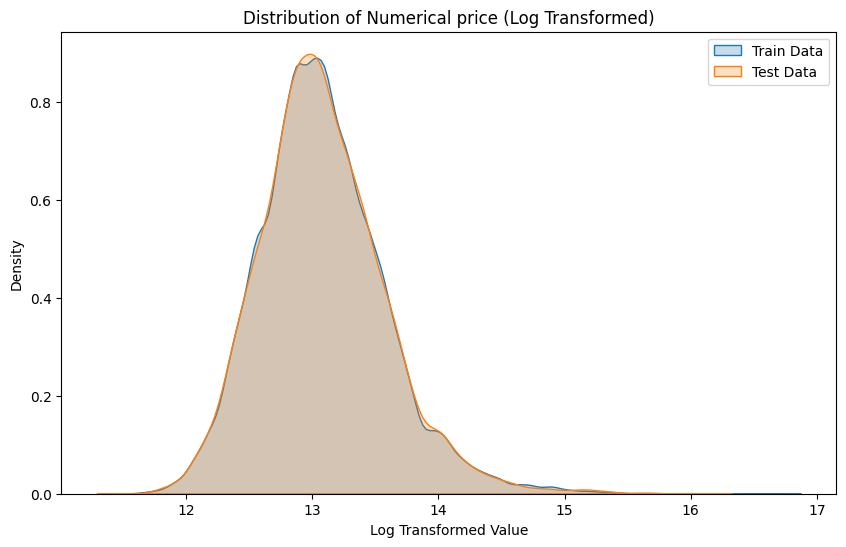

In [12]:
plot_series_distributions(y_train, y_test, title="Distribution of Numerical price (Log Transformed)")

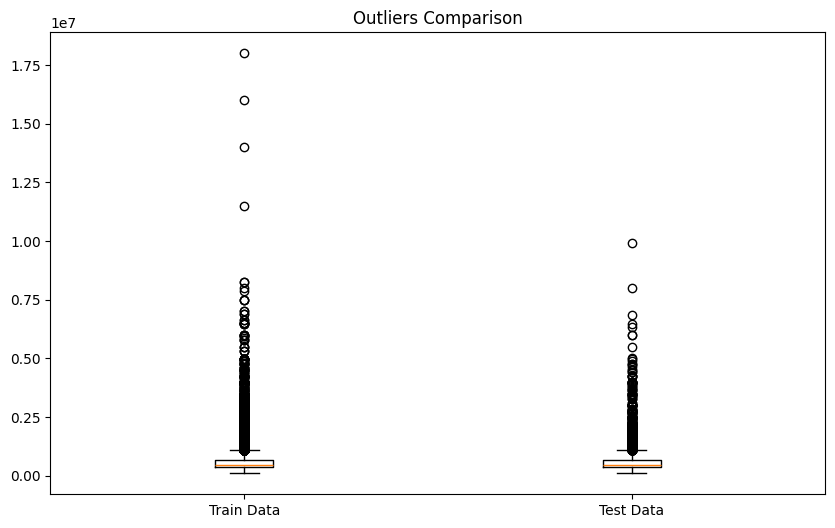

In [6]:
import matplotlib.pyplot as plt

def plot_boxplot(train_series, test_series, title=""):
    plt.figure(figsize=(10, 6))
    plt.boxplot([train_series, test_series], labels=['Train Data', 'Test Data'])
    plt.title(title)
    plt.show()

plot_boxplot(y_train, y_test, title="Outliers Comparison")


In [7]:
def compare_numerical_statistics(train_data, test_data, columns):
    stats_train = train_data[columns].describe()
    stats_test = test_data[columns].describe()
    comparison = pd.concat([stats_train, stats_test], axis=1, keys=['TEST Data', 'TRAIN Data'])
    return comparison

# Assuming you have numerical columns in x_train and x_test
numerical_columns = [ 'size_scaled',
 'longitude_scaled',
 'latitude_scaled', 
 'num_bedrooms',
 'num_rooms',]  # replace with your numerical columns
comparison_stats = compare_numerical_statistics(x_test, x_train, numerical_columns)
print(comparison_stats)


          TEST Data                                                 \
        size_scaled longitude_scaled latitude_scaled  num_bedrooms   
count  14403.000000     14403.000000    14403.000000  14403.000000   
mean      -0.007677         0.007760        0.001753      3.342359   
std        0.956817         1.001075        1.009023      1.160882   
min       -1.555049        -2.359735       -2.631347      2.000000   
25%       -0.564384        -0.768777       -0.579331      3.000000   
50%       -0.179125        -0.154153       -0.030034      3.000000   
75%        0.274930         0.769206        0.581640      4.000000   
max       18.051876         2.604937        2.869194     18.000000   

                       TRAIN Data                                   \
          num_rooms   size_scaled longitude_scaled latitude_scaled   
count  14403.000000  57610.000000     57610.000000    57610.000000   
mean       4.663056      0.001919        -0.001940       -0.000438   
std        1.945833

C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label='Train Data', shade=True)
C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label='Test Data', shade=True)


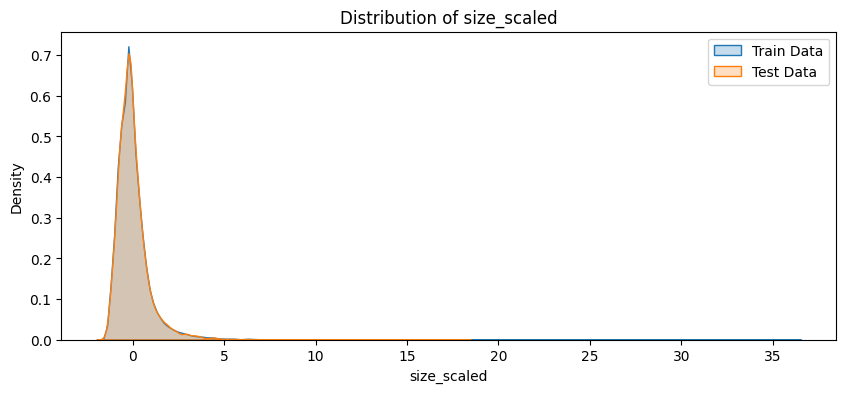

C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label='Train Data', shade=True)
C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label='Test Data', shade=True)


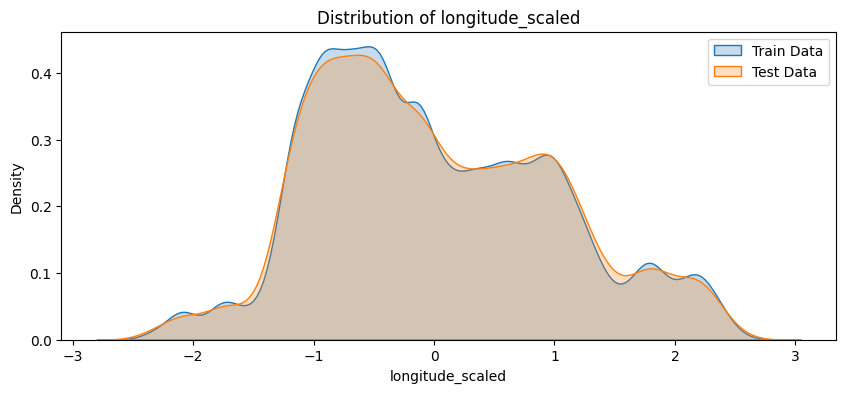

C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label='Train Data', shade=True)
C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label='Test Data', shade=True)


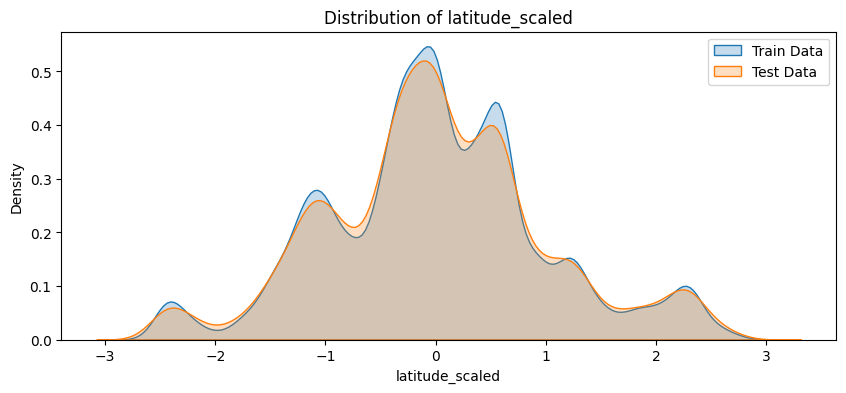

C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label='Train Data', shade=True)
C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label='Test Data', shade=True)


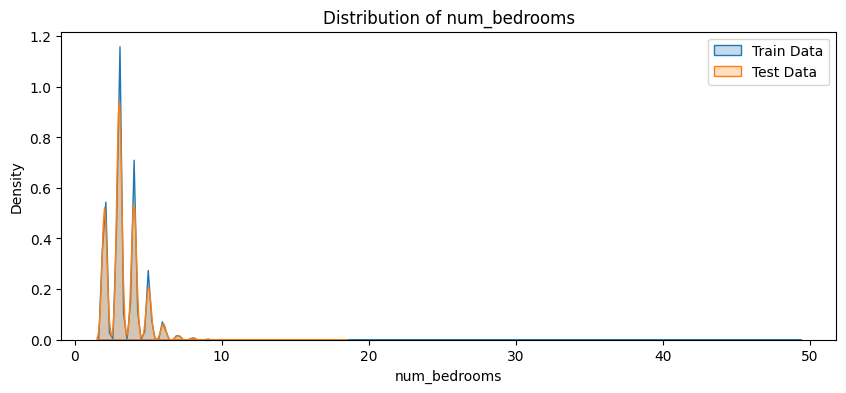

C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label='Train Data', shade=True)
C:\Users\JellevanAs\AppData\Local\Temp\ipykernel_23240\544867101.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label='Test Data', shade=True)


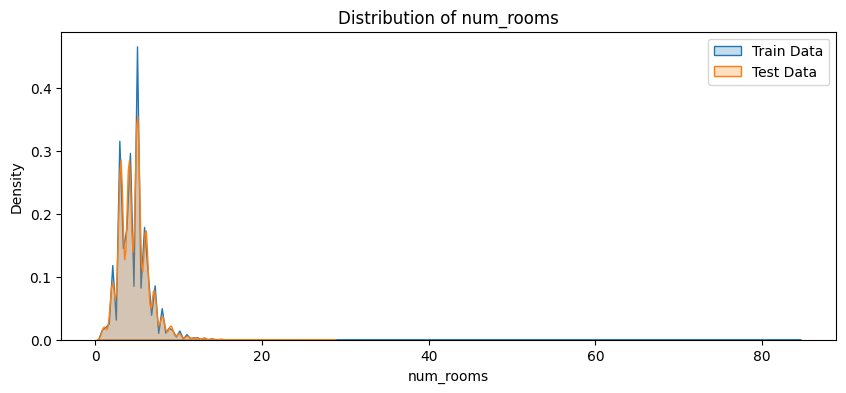

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_distributions(train_data, test_data, columns):
    for col in columns:
        plt.figure(figsize=(10, 4))
        sns.kdeplot(train_data[col], label='Train Data', shade=True)
        sns.kdeplot(test_data[col], label='Test Data', shade=True)
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()

# Plotting distributions
plot_numerical_distributions(x_train, x_test, numerical_columns)


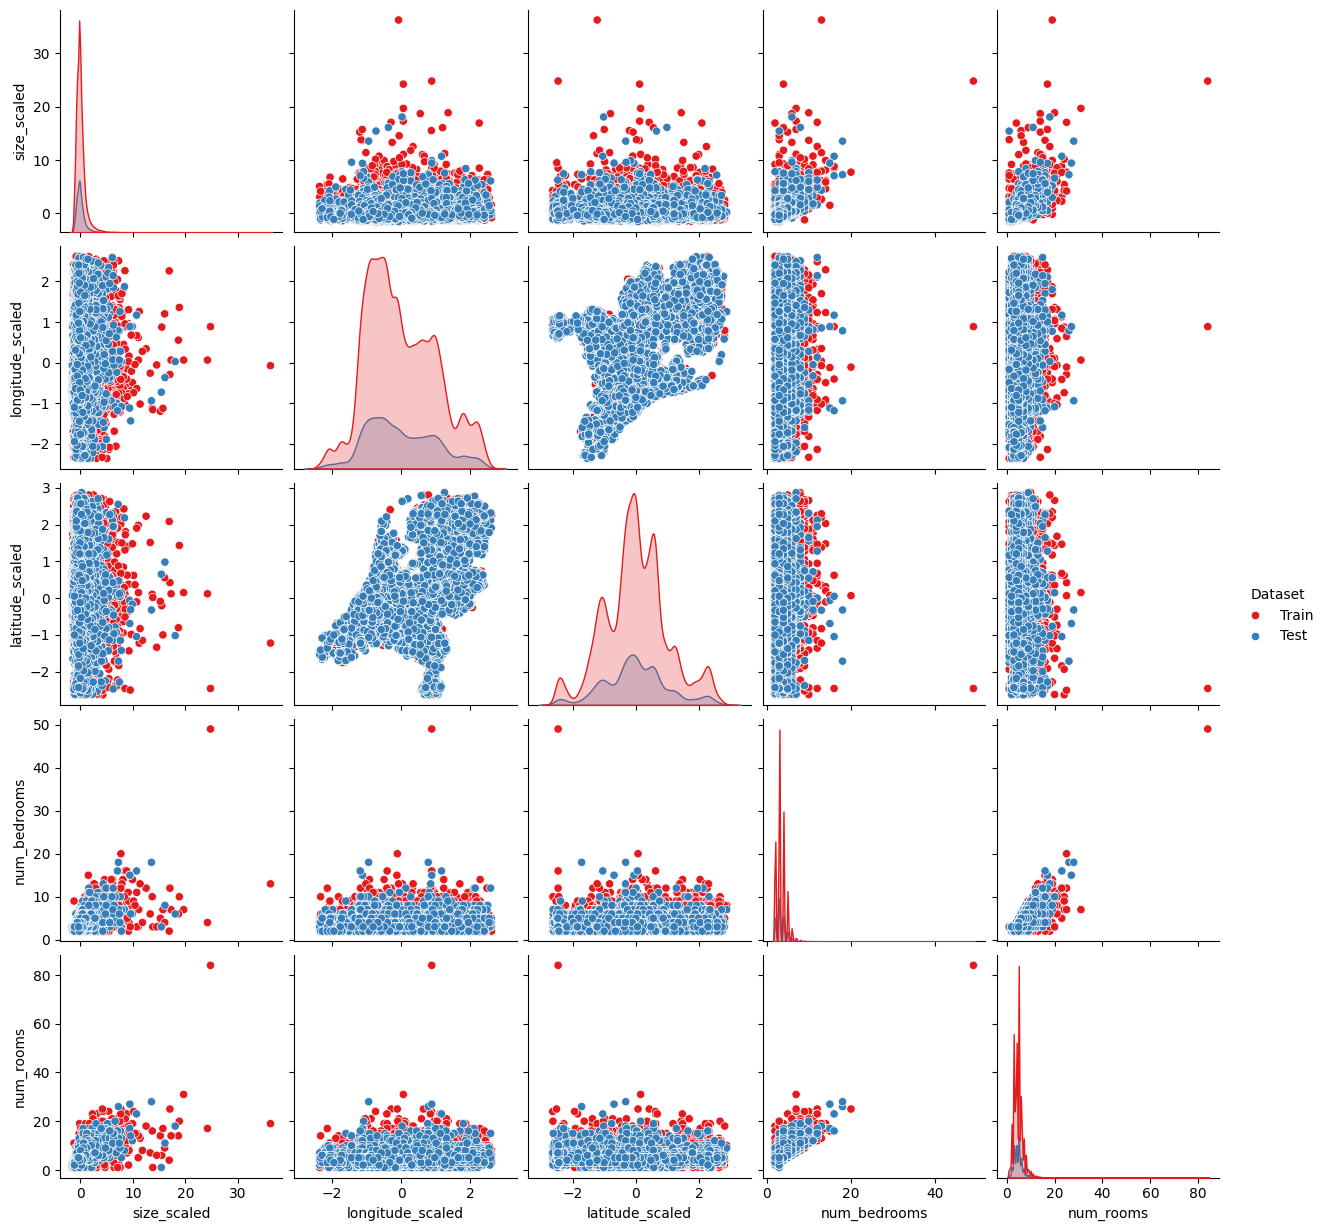

In [9]:
import seaborn as sns

def plot_pairwise_relationship(train_data, test_data, columns, hue=None):
    combined_data = pd.concat([train_data[columns], test_data[columns]], keys=['Train', 'Test'], axis=0)
    combined_data.reset_index(level=0, inplace=True)
    combined_data.rename(columns={'level_0': 'Dataset'}, inplace=True)
    sns.pairplot(combined_data, hue='Dataset', vars=columns, palette='Set1')

# Example usage
plot_pairwise_relationship(x_train, x_test, numerical_columns)
